# Data analysis and modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

In [2]:
# Unimportant plotting parameters
matplotlib.font_manager._rebuild()
plt.rcParams['font.family'] = 'Roboto'
plt.rcParams['font.sans-serif'] = 'Roboto'
plt.rcParams['font.weight'] = 1000

### Step 1: import Value of Statistical Life VSL data

In [3]:
data = pd.read_csv('data_vsl.csv', sep=';', encoding='utf-8', index_col=None, thousands=',')

In [4]:
data

,Paper,Biblio. Ref.,No. Obs.,Publication Year,Country,Mean VSL (dollar 2005),Range (M de dollar 2005),Per capita VSL/GDP ratio
0,ADB,[6],4,2005,Malaysia,1194228,0.7 - 1.7,104.0
1,Alberini & Chiabai,[1],7,2006,Italy,2701947,1 - 5.6,97.0
2,Alberini & Kahn,[8],12,2006,United States,1266037,0.2 - 6.4,30.0
3,Alberini et al.,[3],11,2006,Czech Republic,2965895,0.7 - 5.4,146.0
4,Alberini et al.,[2],2,2004,United States,1421025,1.1 - 1.7,34.0
5,Alberini et al.,[4],3,2007,Italy,3598485,1.4 - 6.3,130.0
6,Alberini et al.,[5],2,2006,Canada,1036062,0.8 - 1.2,27.0
7,Alberini et al.,[5],2,2006,United States,1036062,0.8 - 1.2,27.0
8,Benkhalifa,[XX],XX,2010,Tunisia,149000,NaN,NaN
9,"Buzby, Ready & Skees",[7],2,1995,United States,6521801,5.4 - 7.6,156.0


### Step 2: import HCI data and combine them with VSL data.

In [5]:
hci = pd.read_csv('data-hci.csv', sep=';', encoding='utf-8', index_col=None, decimal=",")

In [6]:
hci

,Country Name,WB Code,Region,Income Group,Probability of Survival to Age 5,Expected Years of School,Harmonized Test Scores,Learning-Adjusted Years of School,Fraction of Kids Under 5 Not Stunted,Adult Survival Rate,HUMAN CAPITAL INDEX (LOWER BOUND),HUMAN CAPITAL INDEX,HUMAN CAPITAL INDEX (UPPER BOUND)
0,Afghanistan,AFG,South Asia,Low income,0.93,8.6,355,4.9,0.59,0.78,0.38,0.39,0.40
1,Albania,ALB,Europe & Central Asia,Upper middle income,0.99,13.0,429,8.9,0.77,0.94,0.61,0.62,0.63
2,Algeria,DZA,Middle East & North Africa,Upper middle income,0.98,11.4,374,6.8,0.88,0.91,0.51,0.52,0.53
3,Angola,AGO,Sub-Saharan Africa,Lower middle income,0.92,7.9,326,4.1,0.62,0.76,0.33,0.36,0.39
4,Argentina,ARG,Latin America & Caribbean,Upper middle income,0.99,13.1,424,8.9,NaN,0.89,0.60,0.61,0.62
5,Armenia,ARM,Europe & Central Asia,Lower middle income,0.99,11.1,443,7.9,0.91,0.88,0.56,0.57,0.58
6,Australia,AUS,East Asia & Pacific,High income,1.00,13.8,524,11.6,0.98,0.95,0.79,0.80,0.81
7,Austria,AUT,Europe & Central Asia,High income,1.00,13.9,525,11.7,NaN,0.94,0.78,0.79,0.80
8,Azerbaijan,AZE,Europe & Central Asia,Upper middle income,0.98,11.6,472,8.7,0.82,0.87,0.58,0.60,0.62
9,Bahrain,BHR,Middle East & North Africa,High income,0.99,13.3,452,9.6,NaN,0.93,0.65,0.67,0.68


In [7]:
for i, row in data.iterrows():
    country = hci[hci['Country Name'] == row['Country']]
    data.loc[i, 'HCI'] = country['HUMAN CAPITAL INDEX'].values[0]
    data.loc[i, 'Region'] = country['Region'].values[0]
    data.loc[i, 'Income Group'] = country['Income Group'].values[0]
    data.loc[i, 'Proba Age 5'] = country['Probability of Survival to Age 5'].values[0]
    data.loc[i, 'Learning-adjusted schooling'] = country['Learning-Adjusted Years of School'].values[0]
    data.loc[i, 'Kids not stunted'] = country['Fraction of Kids Under 5 Not Stunted'].values[0]
    data.loc[i, 'Adult Survival Rate'] = country['Adult Survival Rate'].values[0]
data = pd.concat([data, pd.get_dummies(data['Region'], prefix="dummy")], axis=1, sort=False)
data = pd.concat([data, pd.get_dummies(data['Income Group'], prefix="dummy")], axis=1, sort=False)

In [8]:
# Tryouts with keeping only the most recent data of each country. Not kept.
idx = data.groupby(['Country'])['Publication Year'].transform(max) == data['Publication Year']
data['intercept'] = 1
# data = data[idx]

### First model: regress VCL on HCI

In [9]:
x = data[['intercept', 'HCI']].astype(float)
y = np.log(data['Mean VSL (dollar 2005)'])

In [10]:
model_1 = sm.OLS(y, x).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Mean VSL (dollar 2005)   R-squared:                       0.352
Model:                                OLS   Adj. R-squared:                  0.336
Method:                     Least Squares   F-statistic:                     22.27
Date:                    Thu, 04 Apr 2019   Prob (F-statistic):           2.75e-05
Time:                            15:12:12   Log-Likelihood:                -70.651
No. Observations:                      43   AIC:                             145.3
Df Residuals:                          41   BIC:                             148.8
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.7310      1.172      7.447      0.000       6.363      11.099
HCI            7.6840      1.628      4.720      0.000       4.396      10.972
==============================================================================
Omnibus:                       14.272   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.143
Skew:                          -1.048   Prob(JB):                     0.000115
Kurtosis:                       5.394   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[]

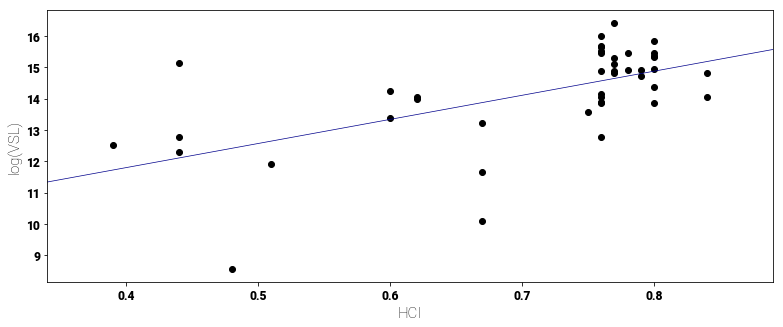

In [11]:
params = model_1.params.values
rangep = np.array([data['HCI'].min() - 0.05, data['HCI'].max() + 0.05])
fig, ax = plt.subplots(figsize=(13,5))
ax.scatter(data['HCI'], np.log(data['Mean VSL (dollar 2005)']), color='black')
ax.plot(rangep, params[0] + rangep * params[1], color='darkblue', linewidth=.7)
ax.set_xlim(rangep)
ax.tick_params(labelsize=12)
ax.set_xlabel('HCI',size=15)
ax.set_ylabel('log(VSL)',size=15)
plt.plot()

### Second model: regress VCL on components of HCI

In [12]:
dummies = [d for d in data.columns if "dummy" in d]
classic = ['intercept', 'HCI']
sub = ['Proba Age 5', 'Learning-adjusted schooling', 'Adult Survival Rate']
X = data[classic + dummies].astype(float)
y = np.log(data['Mean VSL (dollar 2005)'])

In [13]:
model_2 = sm.OLS(y, X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Mean VSL (dollar 2005)   R-squared:                       0.530
Model:                                OLS   Adj. R-squared:                  0.451
Method:                     Least Squares   F-statistic:                     6.755
Date:                    Thu, 04 Apr 2019   Prob (F-statistic):           7.44e-05
Time:                            15:12:12   Log-Likelihood:                -63.765
No. Observations:                      43   AIC:                             141.5
Df Residuals:                          36   BIC:                             153.9
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
intercept                           15.3375      3.211      4.777      0.000       8.826      21.849
HCI                                -16.5901      7.962     -2.084      0.044     -32.738      -0.442
dummy_East Asia & Pacific            4.3478      1.247      3.487      0.001       1.819       6.876
dummy_Europe & Central Asia          4.1813      0.937      4.460      0.000       2.280       6.082
dummy_Middle East & North Africa     1.9597      0.895      2.189      0.035       0.144       3.775
dummy_North America                  3.7329      0.875      4.264      0.000       1.957       5.508
dummy_South Asia                     1.1158      0.553      2.017      0.051      -0.006       2.238
dummy_High income                    8.4431      2.161      3.907      0.000       4.061      12.826
dummy_Lower middle income            3.0755      0.507      6.065      0.000       2.047       4.104
dummy_Upper middle income            3.8190      0.848      4.504      0.000       2.099       5.539
==============================================================================
Omnibus:                        5.293   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.333
Skew:                          -0.507   Prob(JB):                        0.115
Kurtosis:                       4.180   Cond. No.                     5.15e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.87e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""